In [1]:
import torch
from torch import nn
import torchvision
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

import random

import numpy as np

import matplotlib.cm as cm

import pickle

from denoising_assessment_project.utils import functions

%matplotlib notebook

import os

In [2]:
# restoring variables from memory 
%store -r

In [3]:
def identify_BETTER_and_WORSE_alternative(noise_metrics_stats_data, metric_stats_data, metric): 
    values = metric_stats_data[:,:,0]
    std = metric_stats_data[:,:,1]
    noise_values = noise_metrics_stats_data[:,:,0]
    noise_std = noise_metrics_stats_data[:,:,1]
    if metric=='NRMSE' or metric=='RMSE':
        values_BETTER = torch.where(values < noise_values, values, 0)
        std_BETTER = torch.where(values < noise_values, std, 0)
        
        values_WORSE = torch.where(values >= noise_values, values, 0)
        std_WORSE = torch.where(values >= noise_values, std, 0)
    elif metric=='PSNR' or metric=='MS_SSIM' or metric=='SSIM': 
        values_BETTER = torch.where(values > noise_values, values, 0)
        std_BETTER = torch.where(values > noise_values, std, 0)
        
        values_WORSE = torch.where(values <= noise_values, values, 0)
        std_WORSE = torch.where(values <= noise_values, std, 0)
    else: 
        raise Exception("Unsupported metric")
    return [values_BETTER, std_BETTER, values_WORSE, std_WORSE]

In [4]:
metric_stats_N2V_list = [metric_stats_NRMSE_N2V_zoom_zoom, metric_stats_RMSE_N2V_zoom_zoom, metric_stats_PSNR_N2V_zoom_zoom, metric_stats_SSIM_N2V_zoom_zoom, metric_stats_MS_SSIM_N2V_zoom_zoom]
metric_stats_NOISE_list = [metric_stats_NRMSE_beam_zoom_zoom, metric_stats_RMSE_beam_zoom_zoom, metric_stats_PSNR_beam_zoom_zoom, metric_stats_SSIM_beam_zoom_zoom, metric_stats_MS_SSIM_beam_zoom_zoom]
metrics_list = ['NRMSE', 'RMSE', 'PSNR', 'SSIM', 'MS_SSIM']

map_tensor = torch.zeros(metric_stats_NOISE_list[0][:,:,0].shape)

assert len(metric_stats_N2V_list) == len(metric_stats_NOISE_list) 
assert len(metric_stats_N2V_list) == len(metrics_list)

for idx in range(len(metric_stats_N2V_list)): 
    output_idx = identify_BETTER_and_WORSE_alternative(metric_stats_NOISE_list[idx], metric_stats_N2V_list[idx], metrics_list[idx])[0]
    map_tensor = torch.where(output_idx != 0, map_tensor+1, map_tensor)

In [5]:
# alternative view version - each metric separately 
# 5 separate tensor maps 
map_tensor_tem = torch.zeros(metric_stats_NOISE_list[0][:,:,0].shape)
map_tensor_5 = map_tensor_tem.repeat(5,1,1)

assert len(metric_stats_N2V_list) == len(metric_stats_NOISE_list) 
assert len(metric_stats_N2V_list) == len(metrics_list)

for idx in range(len(metric_stats_N2V_list)): 
    output_idx = identify_BETTER_and_WORSE_alternative(metric_stats_NOISE_list[idx], metric_stats_N2V_list[idx], metrics_list[idx])[0]
    map_tensor_5[idx,:,:] = torch.where(output_idx != 0, map_tensor_5[idx,:,:]+1, map_tensor_5[idx,:,:])

In [6]:
ticks_X = indices_eval_zoom[0,0,:]
ticks_Y = indices_eval_zoom[1,:,0]

<IPython.core.display.Javascript object>


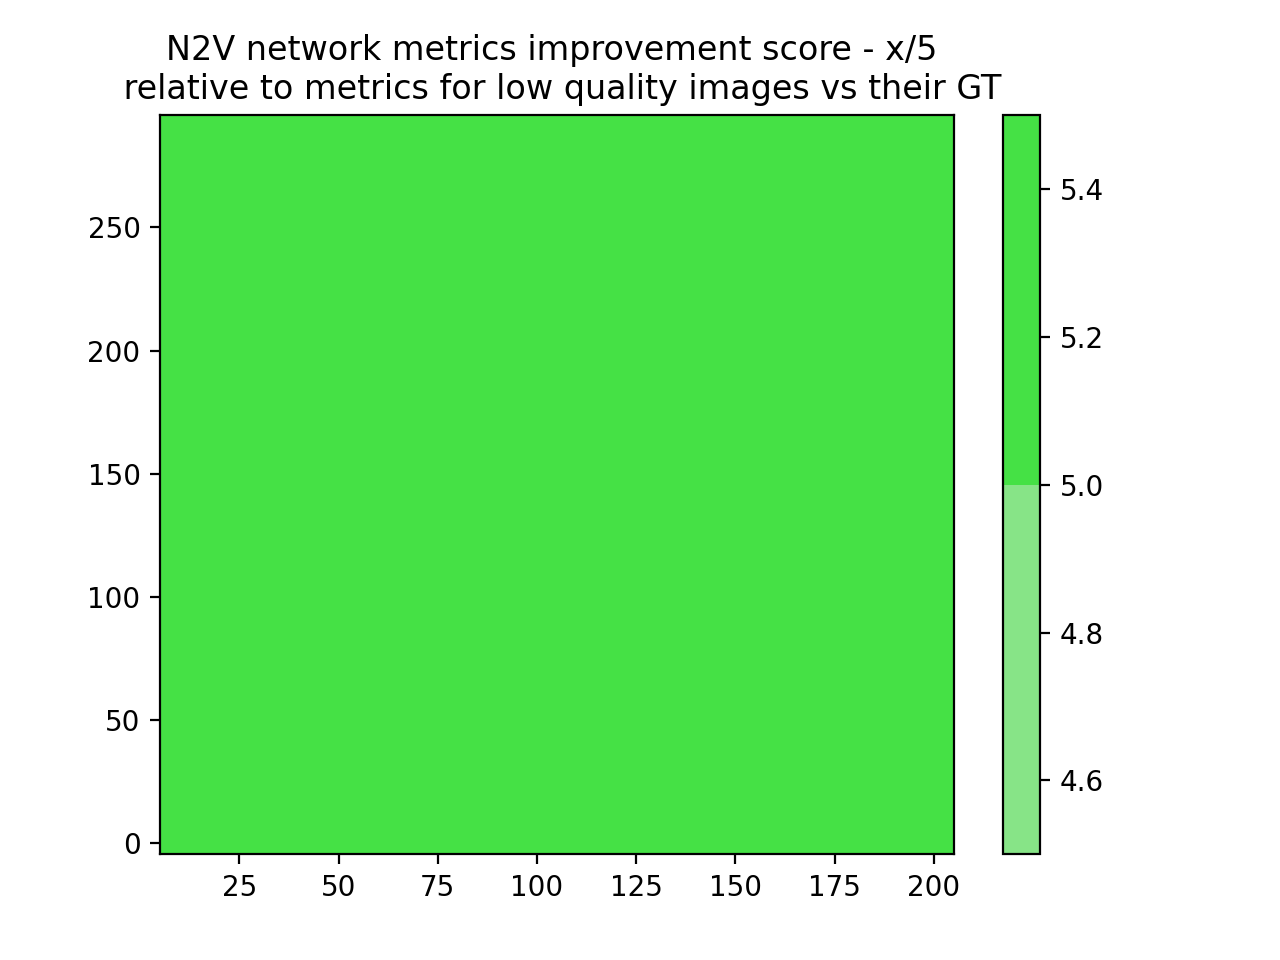

In [7]:
from matplotlib import colors
# source: https://stackoverflow.com/questions/43971138/python-plotting-colored-grid-based-on-values
# create discrete colormap
cmap = colors.ListedColormap(['#87E487', '#45E145'])
bounds = [4,5]
norm = colors.BoundaryNorm(bounds, cmap.N)

y, x = np.meshgrid(ticks_X, ticks_Y)

z = map_tensor.numpy()

fig, ax = plt.subplots()
c = ax.pcolormesh(x, y, z, cmap=cmap)
ax.set_title('N2V network metrics improvement score - x/5 \n relative to metrics for low quality images vs their GT')

fig.colorbar(c, ax=ax)

plt.show()

<IPython.core.display.Javascript object>


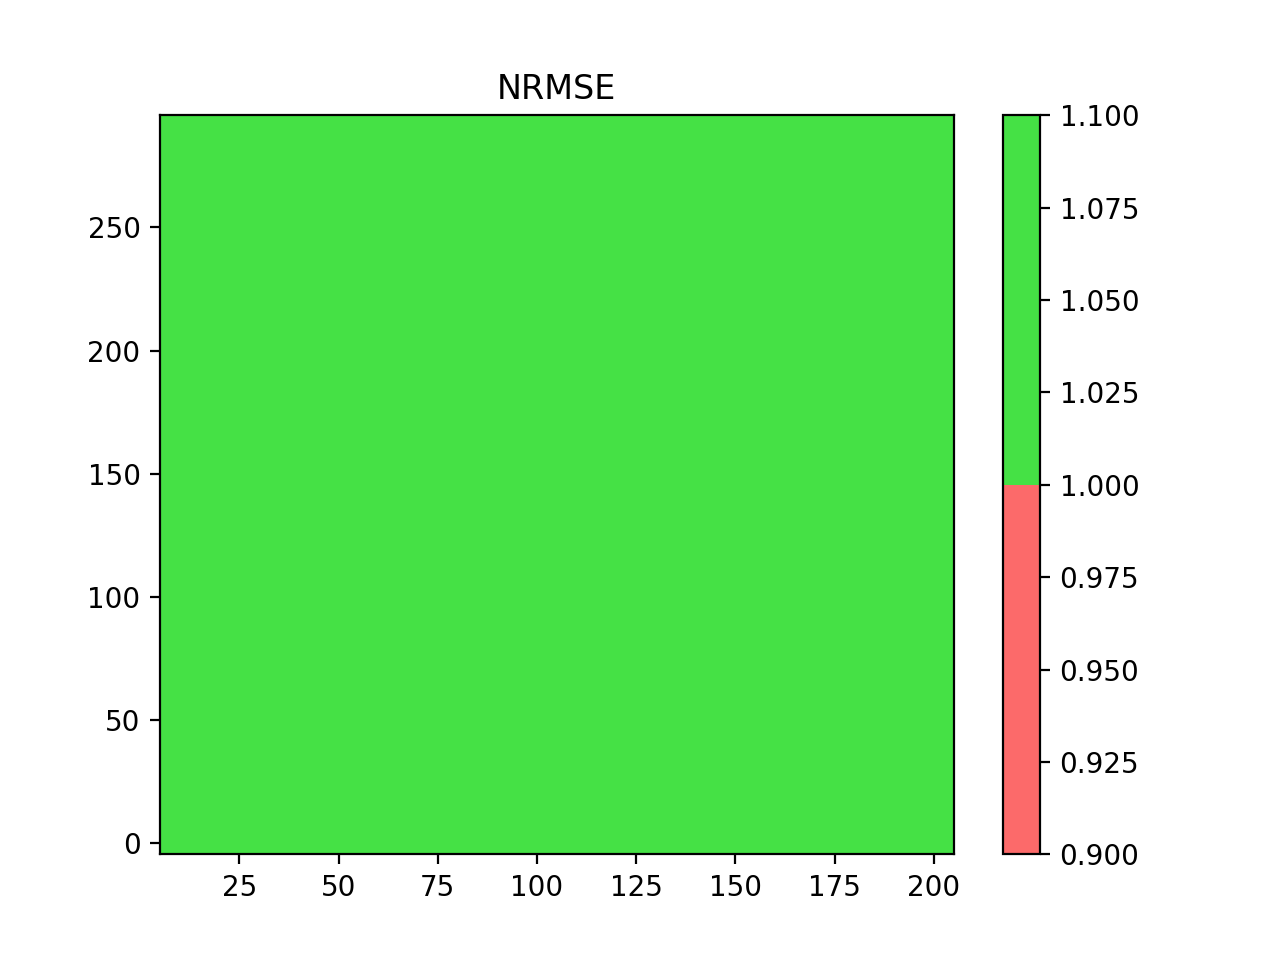

<IPython.core.display.Javascript object>


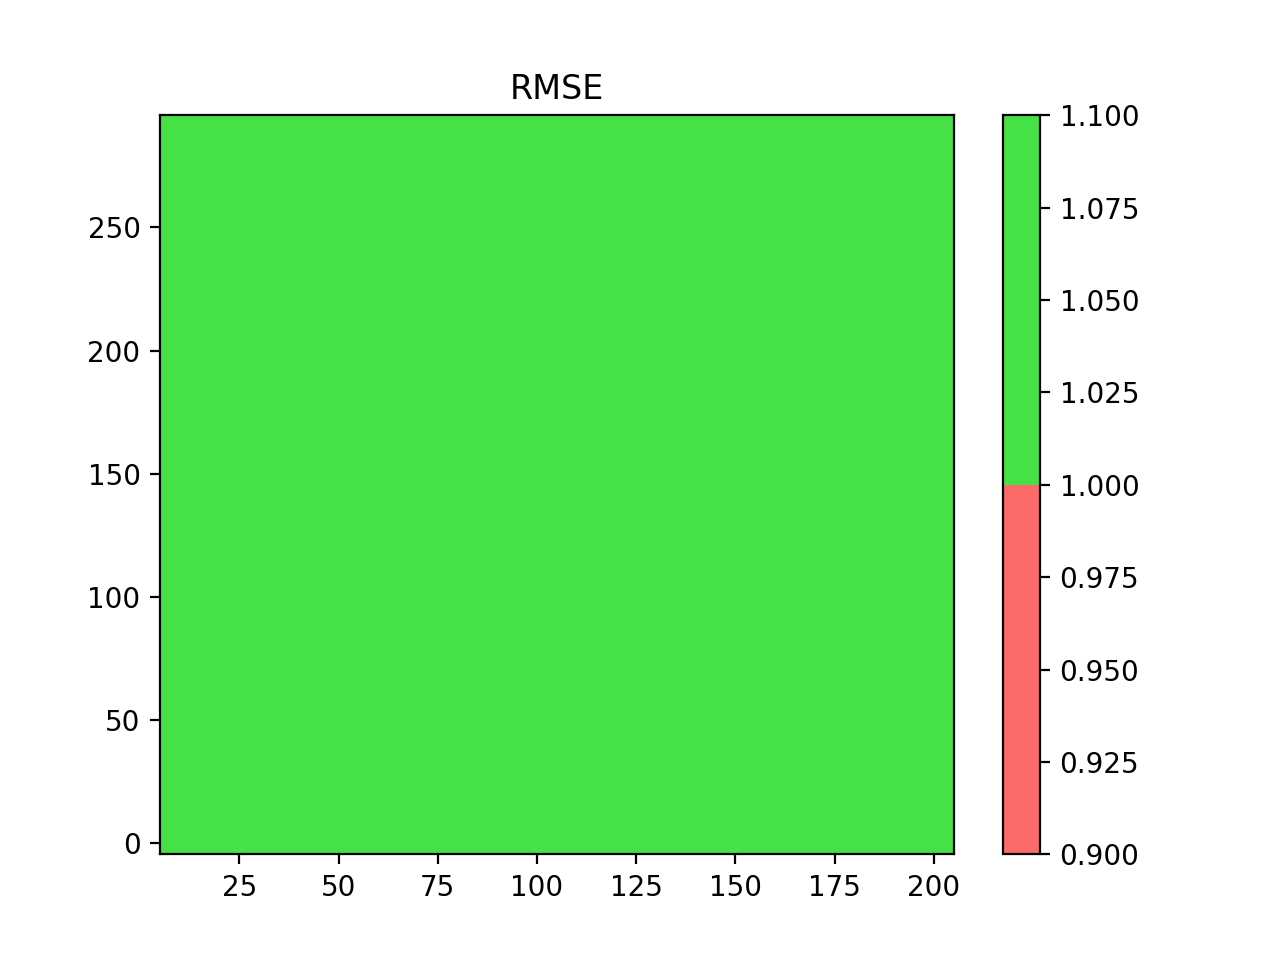

<IPython.core.display.Javascript object>


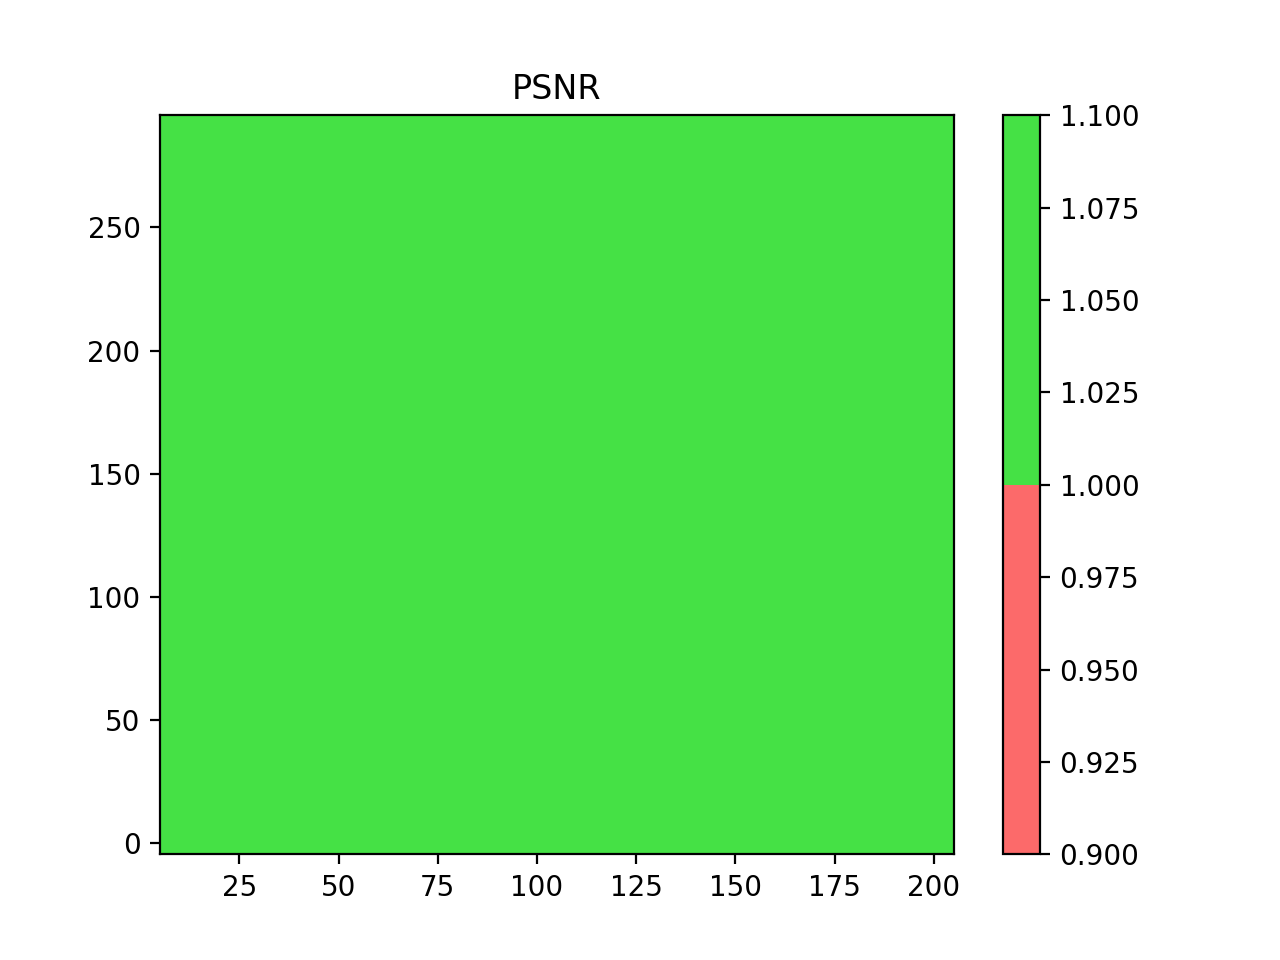

<IPython.core.display.Javascript object>


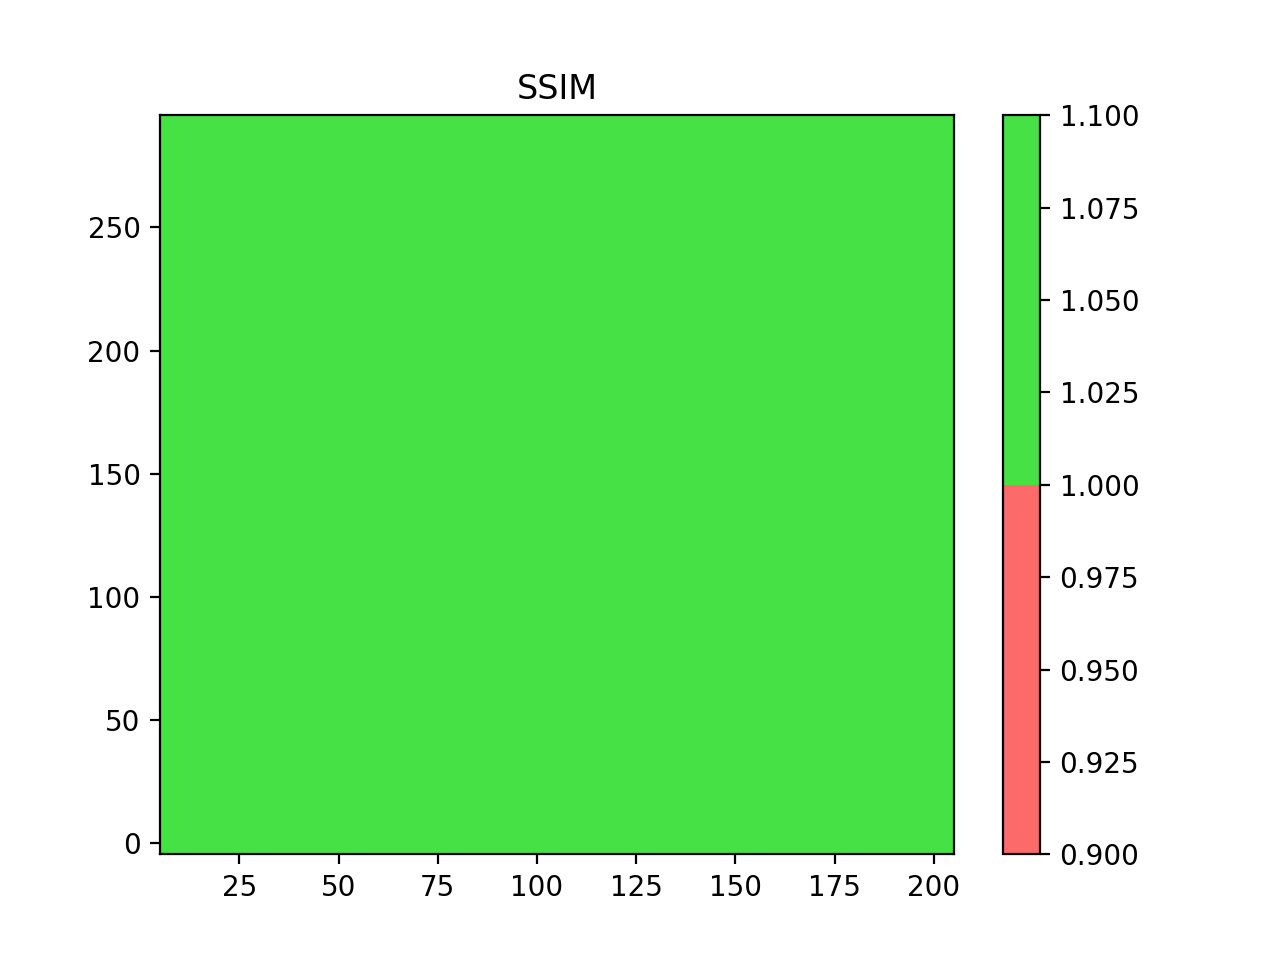

<IPython.core.display.Javascript object>


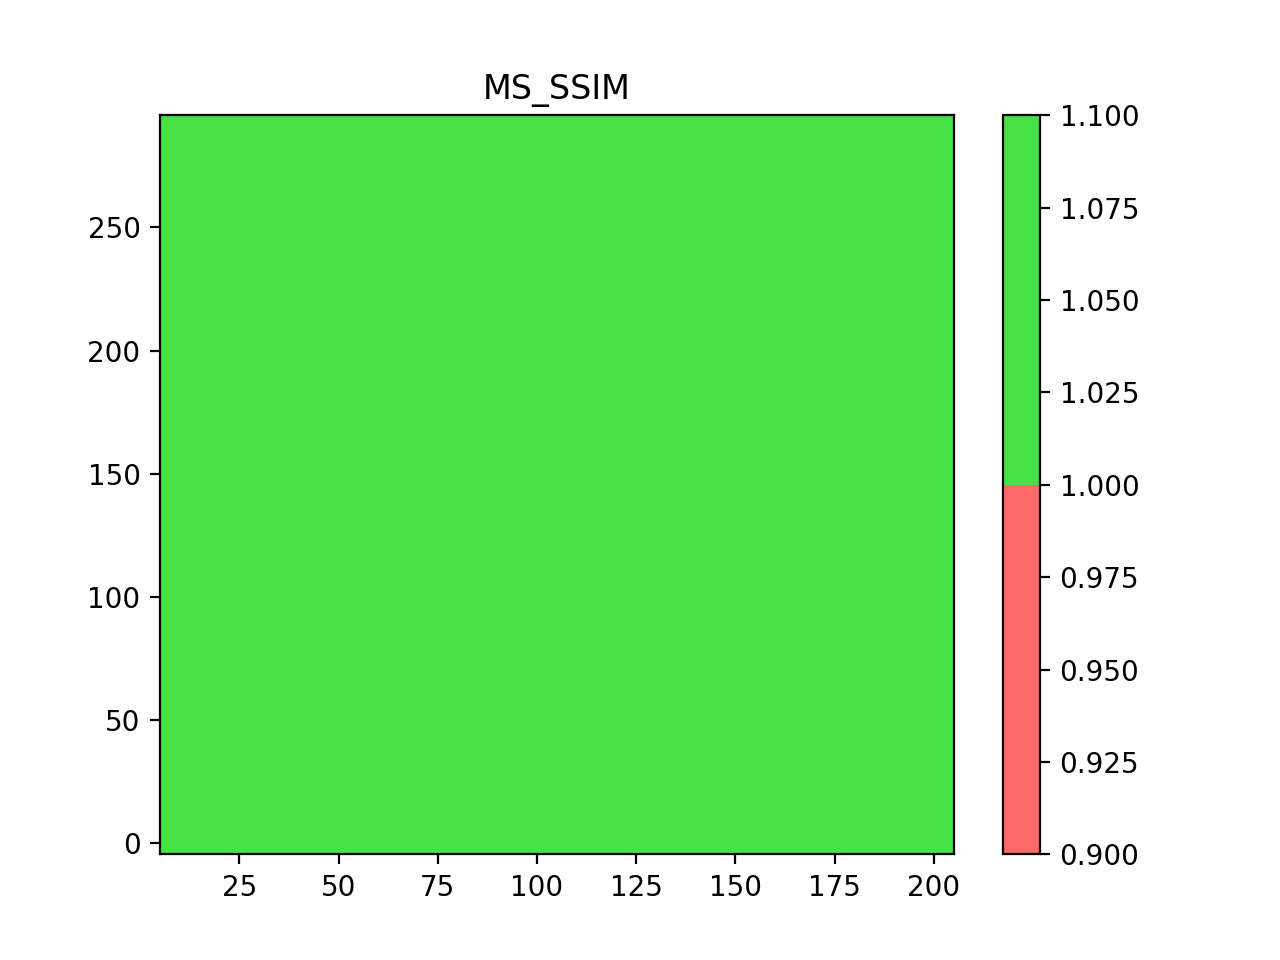

In [8]:
# 5 separate plots based on the map_tensor_5 data 
# source: https://stackoverflow.com/questions/43971138/python-plotting-colored-grid-based-on-values
# create discrete colormap
cmap = colors.ListedColormap(['#FC6A6A', '#45E145'])
bounds = [0,1]
norm = colors.BoundaryNorm(bounds, cmap.N)

y, x = np.meshgrid(ticks_X, ticks_Y)

for idx in range(map_tensor_5.shape[0]):
    z = map_tensor_5[idx].numpy()
    fig, ax = plt.subplots()
    c = ax.pcolormesh(x, y, z, cmap=cmap)
    ax.set_title(metrics_list[idx])

    fig.colorbar(c, ax=ax)

plt.show()